In [22]:
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns# type: ignore
from sklearn.model_selection import train_test_split # type: ignore
from sklearn.linear_model import LinearRegression # type: ignore
from sklearn.metrics import mean_absolute_error # type: ignore
from sklearn.metrics import mean_absolute_percentage_error # type: ignore  
from sklearn.metrics import mean_squared_error # type: ignore
from sklearn.metrics import r2_score # type: ignore

In [23]:
df = pd.read_csv(r"c:\Users\sonam\Downloads\Sleep_health_and_lifestyle_dataset.csv")

In [24]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [25]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [26]:
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [ ]:
df = df.drop(columns=['Sleep Disorder'])

In [ ]:
X = pd.get_dummies(X, drop_first=True)  # Convert categorical to numeric

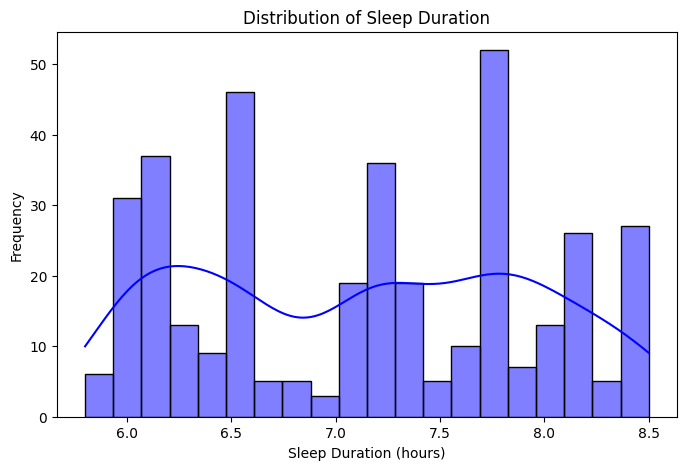

In [33]:
# Set plot style
plt.figure(figsize=(8, 5))
sns.histplot(df['Sleep Duration'], bins=20, kde=True, color='blue')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')
plt.title('Distribution of Sleep Duration')
plt.show()


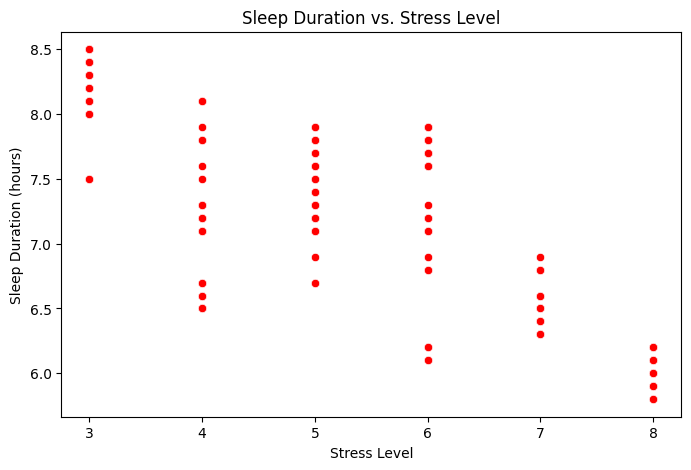

In [34]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Stress Level'], y=df['Sleep Duration'], color='red')

# Labels and title
plt.xlabel('Stress Level')
plt.ylabel('Sleep Duration (hours)')
plt.title('Sleep Duration vs. Stress Level')
plt.show()


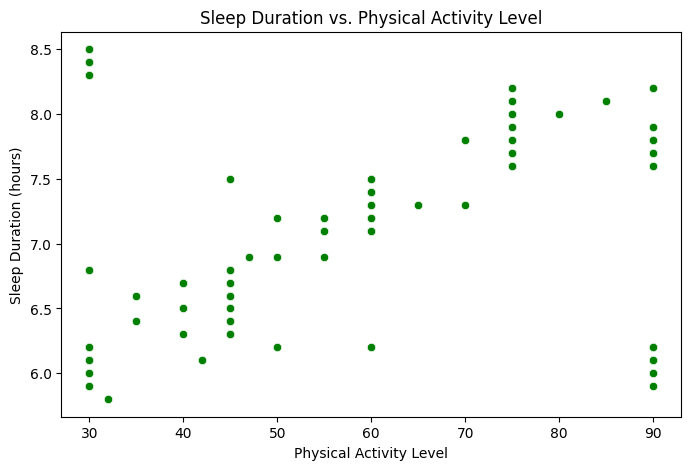

In [35]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Physical Activity Level'], y=df['Sleep Duration'], color='green')

# Labels and title
plt.xlabel('Physical Activity Level')
plt.ylabel('Sleep Duration (hours)')
plt.title('Sleep Duration vs. Physical Activity Level')
plt.show()


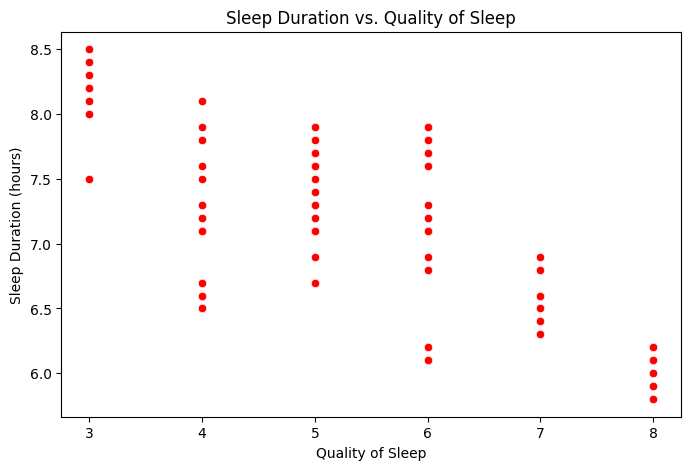

In [52]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Stress Level'], y=df['Sleep Duration'], color='red')

# Labels and title
plt.xlabel('Quality of Sleep')
plt.ylabel('Sleep Duration (hours)')
plt.title('Sleep Duration vs. Quality of Sleep')
plt.show()

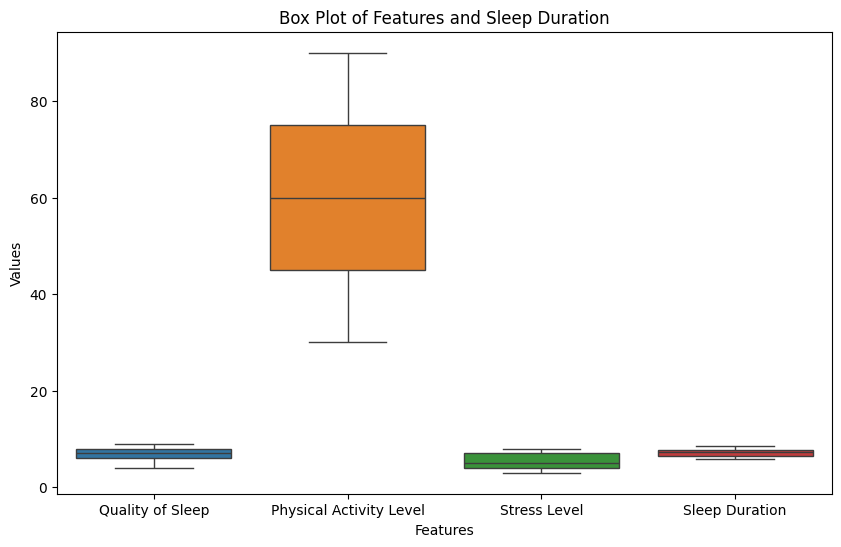

In [59]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Sleep Duration']])
plt.title('Box Plot of Features and Sleep Duration')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()


In [40]:
X = df[['Quality of Sleep', 'Physical Activity Level', 'Stress Level']]  # Independent variables
y = df['Sleep Duration']  # Target variable


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

Model Coefficients: [ 0.52995689  0.00194484 -0.04022593]
Model Intercept: 3.3499655575086713


In [43]:
y_pred = model.predict(X_test)
y_pred[:5]

array([8.05724488, 6.26624457, 6.26624457, 8.05724488, 6.26624457])

In [44]:
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print('Mean Absolute Error = ', mae)
print('Mean Absolute Percentage Error = ', mape)
print('Mean Squared Error = ', mse)
print('R2 Square = ', r_squared)

Mean Absolute Error =  0.3146246348685345
Mean Absolute Percentage Error =  0.044671754491864744
Mean Squared Error =  0.14582591360248828
R2 Square =  0.7809667489067983


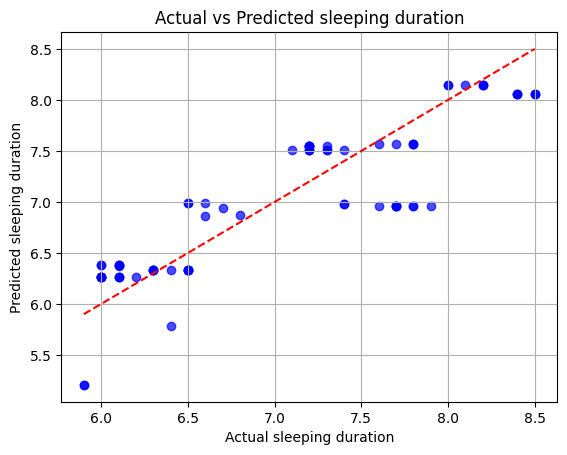

In [45]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Perfect prediction line
plt.title('Actual vs Predicted sleeping duration')
plt.xlabel('Actual sleeping duration')
plt.ylabel('Predicted sleeping duration')
plt.grid(True)
plt.show()

Text(0, 0.5, 'Predicted')

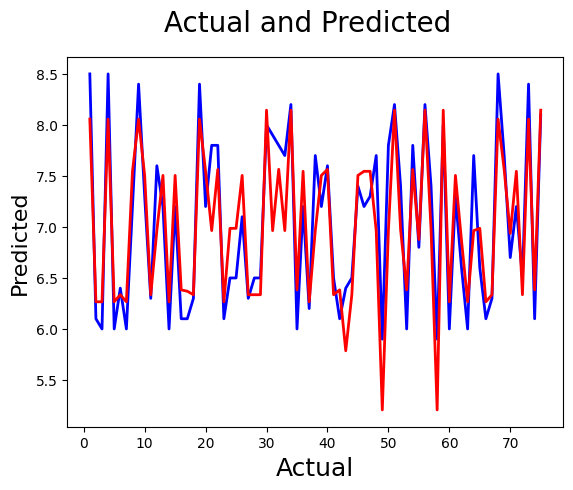

In [46]:
c = [i for i in range(1,len(y_test)+1,1)]         
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              
plt.xlabel('Actual', fontsize=18)                              
plt.ylabel('Predicted', fontsize=16)

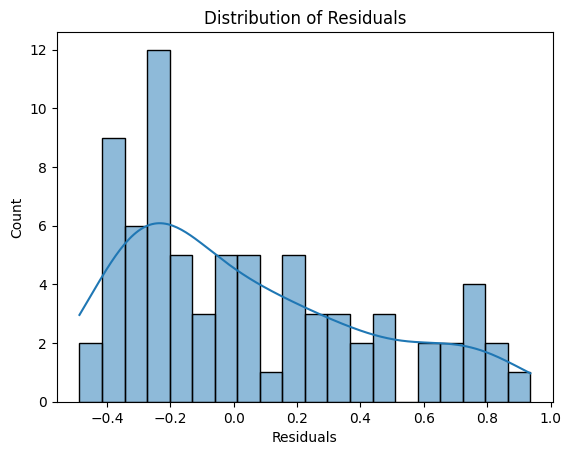

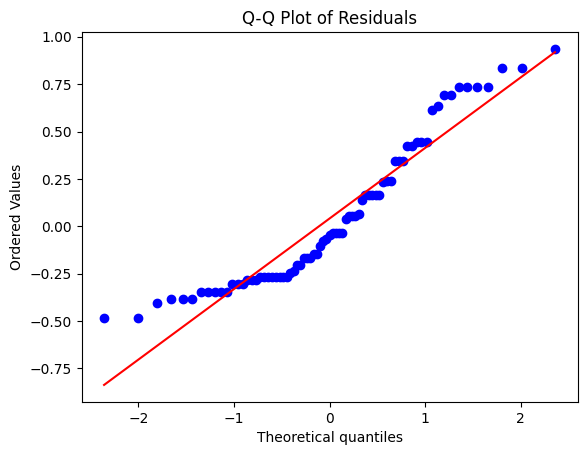

In [49]:
import scipy.stats as stats
import numpy as np

# Calculate residuals
y_pred = model.predict(X_test)
residuals = y_test - y_pred

# Histogram of residuals
sns.histplot(residuals, kde=True, bins=20)
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")
plt.show()

# Q-Q Plot (should form a straight line)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()


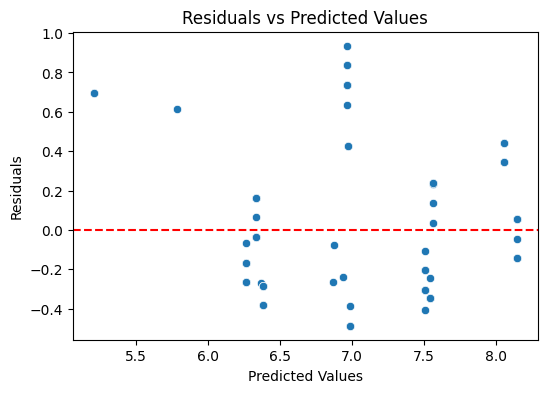

In [50]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()
